In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')
import os
from utils import *
from student_utils_sp18 import *
from networkx.algorithms.traversal import *
from networkx.algorithms.approximation import *
from vasilis_solver import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [6]:
indirectory = "inputs/"
input_files = os.listdir(indirectory)

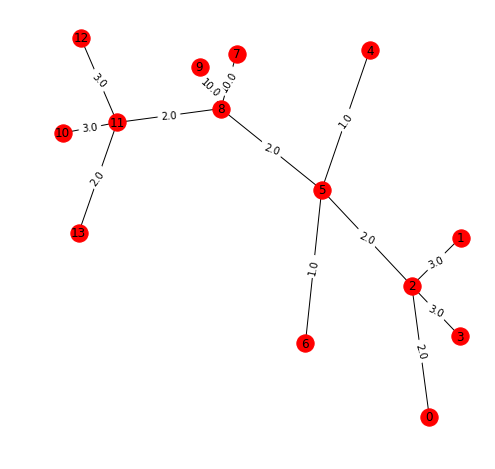

In [7]:
input_data = read_file(indirectory+"0.in")
number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
draw_graph(G)

In [23]:
from pycsa import CoupledAnnealer

def distance(a, b):
    try:
        return G.get_edge_data(a, b)['weight']
    except :
        return -1

distance(0, 1)

-1

In [4]:
def get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix):
    
    name2index = {}
    index2name = {}

    count = 0
    for name in list_of_kingdom_names:
        name2index[name] = count
        index2name[count] = name
        count += 1

    G = adjacency_matrix_to_graph(adjacency_matrix)
    
    color = {}

    for node in G.nodes():
            color[node] = "white"


    conquering_cost = {}
    for node in G.nodes():
        conquering_cost[node] = adjacency_matrix[node][node]

    nx.set_node_attributes(G, conquering_cost, "conquering_cost")
    nx.set_node_attributes(G, color, "color")
    
    return G, name2index[starting_kingdom]

In [5]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    plt.figure(3,figsize=(8,8)) 
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    nx.draw(G, pos, with_labels=True)